<a href="https://colab.research.google.com/github/Franco-Urrutia-G/EIE401-1s-2024/blob/main/Actividades/Actividad%204/Actividad_4_UrrutiaFranco_18916762-8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 4</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: _Franco Urrutia</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Realiza la operación de convolución

<p align="justify">
Una de las operaciones más comunes en tratamiento de imagenes, video etc, es la convolución. Comienza por realizar una convolución entre una señal Pulso y una función impulso filtrada.


<center><img src="https://github.com/Jorgecardenas1/EIE_401_MULTIMEDIA/blob/main/assets/scipy-signal-convolution.png?raw=1"/></center>


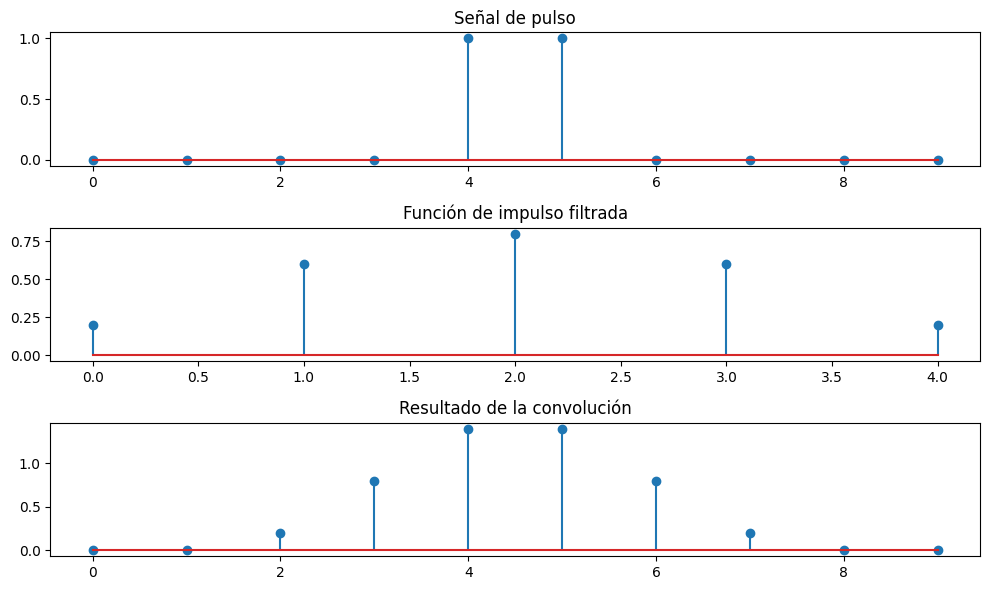

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la señal de pulso
pulso = np.zeros(10)
pulso[4:6] = 1  # Pulso de duración 2 en el centro

# Definir la función de impulso filtrada
impulso_filtrado = np.array([0.2, 0.6, 0.8, 0.6, 0.2])  # Por ejemplo, una función triangular

# Realizar la convolución
resultado = np.convolve(pulso, impulso_filtrado, mode='same')

# Graficar las señales y el resultado de la convolución
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.stem(pulso)
plt.title('Señal de pulso')

plt.subplot(3, 1, 2)
plt.stem(impulso_filtrado)
plt.title('Función de impulso filtrada')

plt.subplot(3, 1, 3)
plt.stem(resultado)
plt.title('Resultado de la convolución')

plt.tight_layout()
plt.show()


## 2. Cancelación de Ruido (Denoising)
<p align="justify">
Implementa un algoritmo para eliminar el ruido de una señal. Puedes apoyarte en esta referencia (https://www.youtube.com/watch?v=s2K1JfNR7Sc)

1. Debes tener la señal original
2. Debes agregar ruido a la señal
3. Obtener el valor medio de la señal con ruido
4. Implementar transformaciones y filtrado.
    


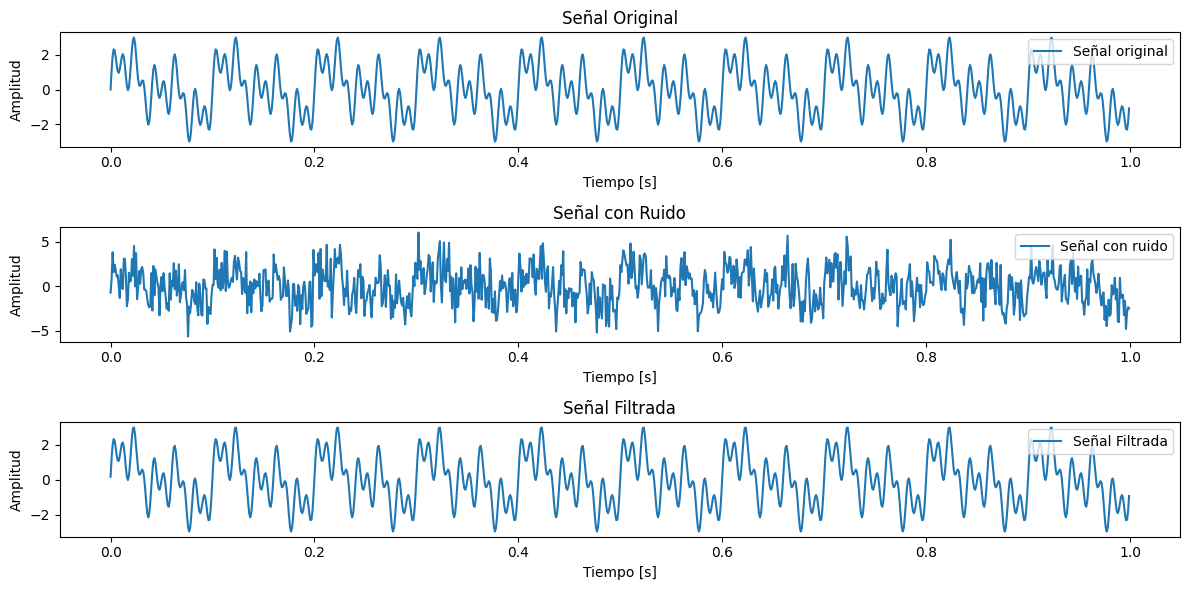

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
from scipy.signal import welch

# Crear la señal senoidal compuesta
fs = 1000  # Frecuencia de muestreo
t = np.linspace(0, 1, fs, endpoint=False)  # Tiempo de 0 a 1 segundo
frequencies = [10, 20, 50, 100]  # Frecuencias de las señales senoidales
amplitude = 1  # Amplitud de las señales senoidales

signal = np.zeros_like(t)
for freq in frequencies:
    signal += amplitude * np.sin(2 * np.pi * freq * t)

# Añadir ruido a la señal
noise_amplitude = 1.5
noise = noise_amplitude * np.random.randn(len(t))
signal_with_noise = signal + noise

# Calcular la FFT de la señal original con ruido
fft_signal_with_noise = fft(signal_with_noise)

# Calcular la densidad espectral de potencia (PSD)
frequencies_fft = fftfreq(len(t), 1/fs)
psd = np.abs(fft_signal_with_noise)**2 / len(t)

# Crear un filtro basado en los valores de PSD mayores a 150
filtro = np.where(psd > 150, 1, 0)

# Aplicar el filtro a la FFT original
fft_signal_filtrada = filtro * fft_signal_with_noise

# Calcular la IFFT para obtener la señal filtrada
signal_filtrada = ifft(fft_signal_filtrada)

# Graficar la señal original, la señal con ruido y la señal filtrada
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(t, signal, label='Señal original')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Señal Original')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, signal_with_noise, label='Señal con ruido')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Señal con Ruido')
plt.legend()

# Tomamos solo la parte real de la señal filtrada
signal_filtrada = np.real(signal_filtrada)

plt.subplot(3, 1, 3)
plt.plot(t, signal_filtrada, label='Señal Filtrada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Señal Filtrada')
plt.legend()

plt.tight_layout()
plt.show()


## 3. Wavelets
### 3.1 Desarrolla una transformada wavelet 1D
<p align="justify">
Implementa transformaciones con 1-D wavelet usando la función Mexican Hat Wavelet.

$$m(x) = \frac{2}{\sqrt{3 \sigma} \pi^{\frac{1}{4}}} \left(1-\frac{x^2}{\sigma^2}\right) e^{\frac{-x^2}{2 \sigma^2}}$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def mexican_hat(x, mu, sigma):

    return 0


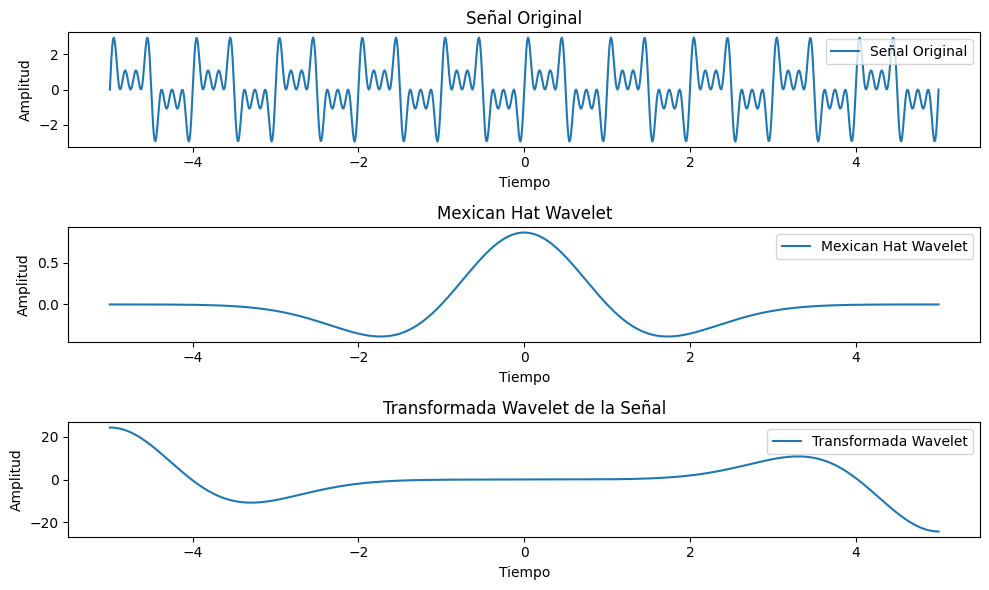

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def mexican_hat(x, mu, sigma):

    m = (2 / (np.sqrt(3 * sigma) * np.pi**(1/4))) * (1 - (x - mu)**2 / sigma**2) * np.exp(-(x - mu)**2 / (2 * sigma**2))
    return m

def plot_wavelet(signal, wavelet, transformed_signal, t):
    """
    Función para graficar la señal, wavelet y transformada wavelet.

    Args:
        signal: Señal original.
        wavelet: Wavelet utilizada.
        transformed_signal: Señal transformada.
        t: Vector de tiempo.
    """
    plt.figure(figsize=(10, 6))

    plt.subplot(3, 1, 1)
    plt.plot(t, signal, label='Señal Original')
    plt.title('Señal Original')
    plt.xlabel('Tiempo')
    plt.ylabel('Amplitud')
    plt.legend()

    plt.subplot(3, 1, 2)
    plt.plot(t, wavelet, label='Mexican Hat Wavelet')
    plt.title('Mexican Hat Wavelet')
    plt.xlabel('Tiempo')
    plt.ylabel('Amplitud')
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.plot(t, transformed_signal, label='Transformada Wavelet')
    plt.title('Transformada Wavelet de la Señal')
    plt.xlabel('Tiempo')
    plt.ylabel('Amplitud')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Parámetros
mu = 0  # Media de la wavelet
sigma = 1.0  # Desviación estándar de la wavelet
num_points = 1000
t = np.linspace(-5, 5, num_points)
frequencies = [1, 3, 5, 7]  # Frecuencias de las señales senoidales
amplitudes = [1.0, 1, 1, 1]  # Amplitudes de las señales senoidales

# Generar la señal senoidal con cuatro frecuencias
signal = np.zeros_like(t)
for freq, amp in zip(frequencies, amplitudes):
    signal += amp * np.sin(2 * np.pi * freq * t)

# Calcular la Mexican Hat Wavelet
wavelet = mexican_hat(t, mu, sigma)

# Calcular la transformada wavelet de la señal
transformed_signal = np.convolve(signal, wavelet, mode='same')

# Plot
plot_wavelet(signal, wavelet, transformed_signal, t)


### 3.2 Escribe un algoritmo para calcular la transformada discreta
<p align="justify">
En cierta forma se trata solo de aplicar al sumatoria sobre una señal que tengas (obviamente debes definir una señal de estudio, con ruido o que tenga varías frecuencias involucradas).

Debes hacerlo solo para un nivel (level). Recuerda que la transformada trabaja por niveles y puede ser dispendioso. En este caso de debe considerar que $$a_0=2$$ y $$b_0=1$$, así como también debe asumir un valor específico para _m_.

En teoría, la transformada es como sigue:

$$ (T^{\text{wav}} f)(a,b) = \sqrt{|a|} \int dt \; f(t) \psi \left(\frac{t-b}{a}\right) $$

$a = a_0^m$ and $b = n b_0 a_0^m$

Aquí a y b son parámetros para la escala y posición de la wavelet. Esto se puede escribir de forma discreta de tal forma que puedas asignar una posición y escala a la onda asignando los valores que quieres, pero en este caso usarás $$a_0=2$$ y $$b_0=1$$.

$$ (T^{\text{wav}} f)(a,b) = T^\text{wav}_{m,n}(f) = \int dt \; f(t) \psi_{m,n} (x) $$
con
$$ \psi_{m,n} = a_0^{\frac{-m}{2}} \psi\left(a_0^{-m}x - nb_0\right) $$

### Recuerda que la integral se convierte en una sumatoria.

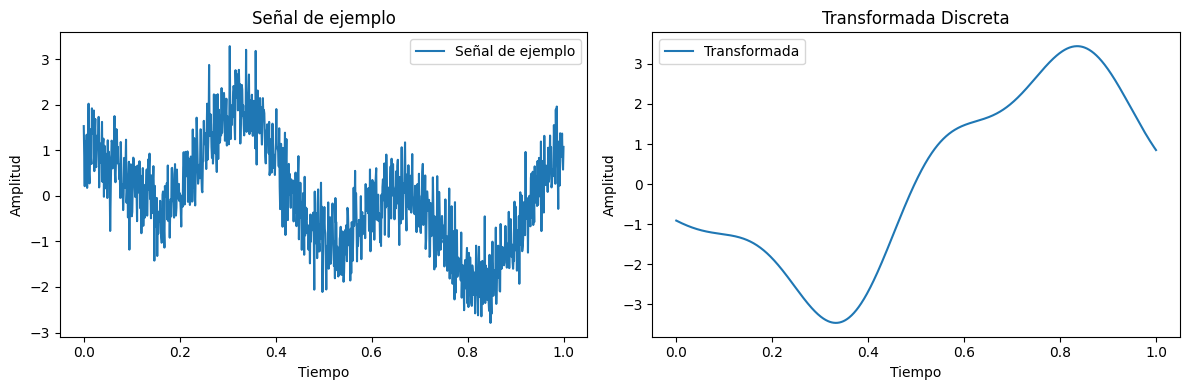

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def signal(t):
    # Señal de ejemplo: suma de senos y cosenos con ruido
    return np.sin(2 * np.pi * 1 * t) + np.cos(2 * np.pi * 3 * t) + 0.5 * np.random.randn(len(t))

def wavelet(x, m, n):
    # Wavelet Gaussiana
    a0 = 2
    b0 = 1
    psi = np.exp(-x**2 / 2)  # Gaussiana

    psi_mn = a0**(-m/2) * psi * (a0**(-m) * x - n*b0)
    return psi_mn

def discrete_wavelet_transform(signal, m, n):
    # Parámetros
    a0 = 2
    b0 = 1
    dt = 0.01  # Paso de tiempo, puedes ajustarlo según tu necesidad
    t = np.arange(0, len(signal) * dt, dt)

    # Transformada discreta
    transformed_signal = np.zeros(len(signal))
    for i in range(len(signal)):
        x = t - t[i]  # Shifting
        integrand = signal * wavelet(x, m, n)
        transformed_signal[i] = np.sum(integrand) * dt

    return transformed_signal

# Generar señal de ejemplo
t = np.linspace(0, 1, 1000)
example_signal = signal(t)

# Calcular transformada discreta
m = 1  # Puedes cambiar estos valores
n = 2
transformed_signal = discrete_wavelet_transform(example_signal, m, n)

# Graficar
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(t, example_signal, label='Señal de ejemplo')
plt.title('Señal de ejemplo')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t, transformed_signal, label='Transformada')
plt.title('Transformada Discreta')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()

plt.tight_layout()
plt.show()


###  3.2.1. Explica el siguiente fragmento de código en detalle

In [ ]:
# we assume a0 = 2 and b0 = 1
# These are the scaling and translation factors
#using just o pair, means an specific wavelet.

#Los comentarios estableecn algunas normas para las cuales se trabajará el codigo

def psi_mn(psi, m, n):
    a = 2**m
    b = n*2**m
    wav = np.zeros(len(psi)*a + b)
    wav[b:b+len(psi)*a] = np.interp(np.arange(len(psi)*a)/a,np.arange(len(psi)),psi)
    return wav

# Definición de la función psi_mn. Toma como entrada una función de wavelet psi,
# y los factores de escala (m) y traslación (n). Luego, calcula los valores de la
#  función de wavelet escalada y trasladada y los devuelve.



psi = mexican_hat(np.arange(-5,5,0.1),0,1)
#Se genera la wavelet mexican hat

xlim = (0,350)
#limite eje x

ns = [1, 30, 60]
ms = [0, 1]
# listas de valores para los factores de escala (ms) y traslación (ns)

plt.figure(figsize=(15,4))
plt.subplot(121)

for mi in range(len(ms)):
    m = ms[mi]
    plt.subplot(1,len(ms),mi+1)
    for n in ns:
        plt.plot(psi_mn(psi, m, n), label="n="+str(n))
    plt.title("m = "+str(m))
    plt.legend(loc="best")
    plt.xlim(xlim)
plt.show()


# -Este bucle recorre los valores de m (factores de escala) y para cada uno de ellos,
# grafica las versiones escaladas y trasladadas de la función de wavelet
# para los valores de n especificados.
# -Etiqueta las líneas con los valores de n.
# Muestra un título que indica el valor de m y establece los límites del eje x.
# Finalmente, muestra la gráfica completa.



### 3.2.2 completa el siguiente código para realizar la transformada


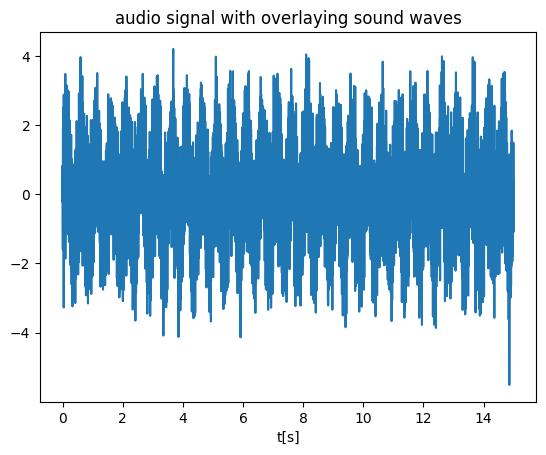

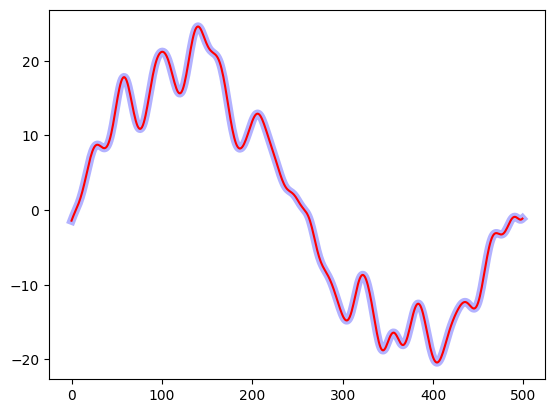

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def psi(x):
    """Define your wavelet function here"""
    # Por ejemplo, una función gaussiana
    sigma = 1
    return np.exp(-0.5 * (x / sigma) ** 2)

def twav_mn(f, psi, m, n):
    f_scaled = f * psi((np.arange(len(f)) - n) / (2 ** m))
    transform_scaled = np.sum(f_scaled)
    return transform_scaled

def twav_mn_naive(f, psi, m, n):
    pmn = psi((np.arange(len(f)) - n) / (2 ** m))
    transform = np.sum(f * pmn)
    return transform

m = 3  # single value for m
ns = np.arange(1000, 1500)
res = 1000  # resolution
freq = 2  # frequency


x = np.arange(0, 15000, 1)
noise = np.random.normal(0, 1, len(x))

audio = np.sin(np.arange(15000) * 2 * np.pi * freq / res) + noise

transformed_sweept = [twav_mn(audio, psi, m, n) for n in ns]
naive_transformed_sweept = [twav_mn_naive(audio, psi, m, n) for n in ns]

plt.plot(np.arange(len(audio), dtype="float32") / res, audio)
plt.xlabel("t[s]")
plt.title("audio signal with overlaying sound waves")
plt.show()

plt.plot(transformed_sweept, color="blue", lw=6, alpha=0.3)
plt.plot(naive_transformed_sweept, "r-")
plt.show()


### 3.2 Wavelet usando librería
<p align="justify">
Usa la librería PyWavelets (pywt) con los datos provenientes del dataset  = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat". Estos datos son históricos sobre el fenómeno del Niño.

0. Debes descargar los datos desde python, usando numpy o pandas, debes aplicar la transformada continua pywt.cwt.

1. Obtendrás los coeficientes de la transformación.
2. Debes poner todos los resultados en términos de potencia.
3. Debes graficar el resultado tanto en el periodo como en la frecuencia usando un plot tipo contour.

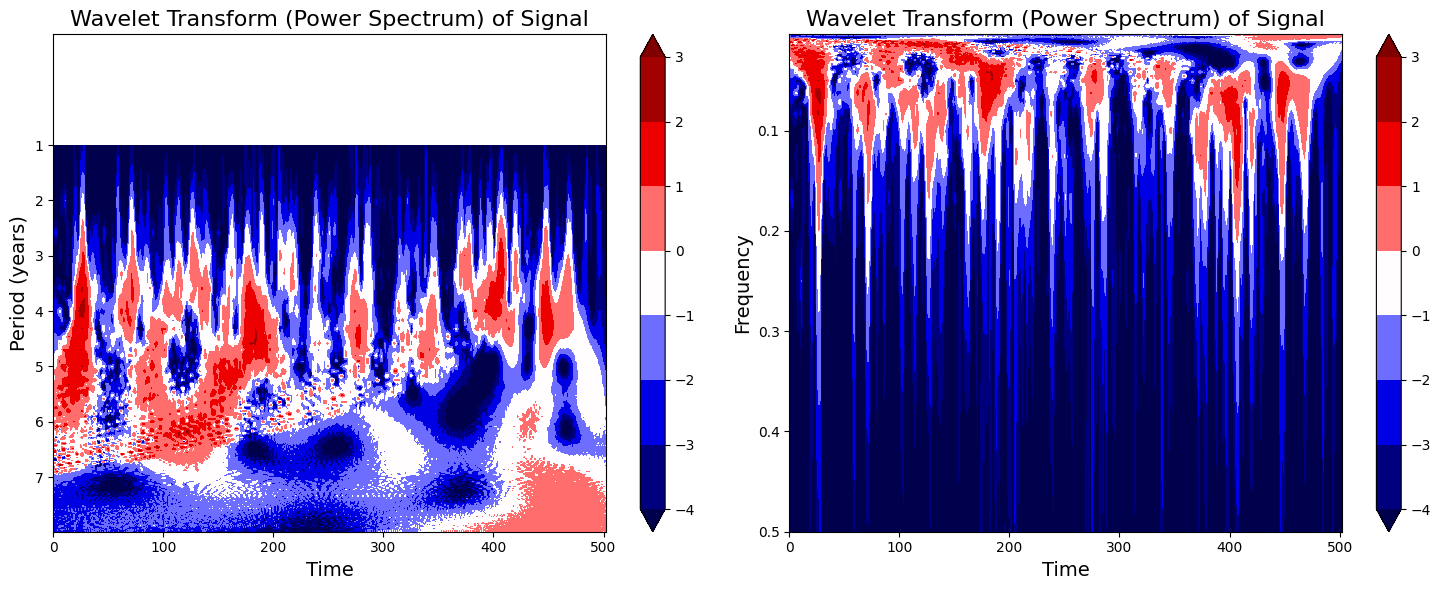

In [ ]:
def plot_wavelet_contour(signal, time):
    scales = np.arange(1, 128)
    [coefficients, frequencies] = pywt.cwt(signal, scales, 'cmor')
    power = (abs(coefficients)) ** 2
    period = 1. / frequencies

    dt = time[-1] - time[0]

    levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
    contourlevels = np.log2(levels)

    plt.figure(figsize=(15, 6))

    # Contour Plot for Time vs. Log2(Period)
    plt.subplot(1, 2, 1)
    im1 = plt.contourf(time, np.log2(period), np.log2(power), contourlevels, extend='both', cmap=plt.cm.seismic)
    plt.title('Wavelet Transform (Power Spectrum) of Signal', fontsize=16)
    plt.ylabel('Period (years)', fontsize=14)
    plt.xlabel('Time', fontsize=14)
    plt.yticks(np.log2(2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))))
    plt.gca().invert_yaxis()
    plt.ylim(plt.ylim()[0], -1)
    plt.colorbar(im1)

    # Contour Plot for Frequency vs. Time
    plt.subplot(1, 2, 2)
    im2 = plt.contourf(time, frequencies, np.log2(power), contourlevels, extend='both', cmap=plt.cm.seismic)
    plt.title('Wavelet Transform (Power Spectrum) of Signal', fontsize=16)
    plt.ylabel('Frequency', fontsize=14)
    plt.xlabel('Time', fontsize=14)
    plt.gca().invert_yaxis()
    plt.colorbar(im2)

    plt.tight_layout()
    plt.show()

plot_wavelet_contour(signal, np.arange(0, len(signal)))


### 3.3 Interpreta los resultados del punto anterior.
<p align="justify">
Debes explicar que significa el gráfico obtenido  en términos del periodo o frecuencia del evento que estamos analizando.

In [2]:
#La energía se concentra en un periodo de 2 a 8 años.
#Podemos ver que hasta la mitad del gráfico hubiero grandes variaciones en el poder en el poder, mientras que después no hubo tantas.
# También podemos ver que hay un cambio de períodos más largos a más cortos a medida que avanza el tiempo.



## 4. Referencias
<p align="justify">

https://notebook.community/CSchoel/learn-wavelets/wavelet-introduction

https://www.kaggle.com/code/asauve/a-gentle-introduction-to-wavelet-for-data-analysis

https://pywavelets.readthedocs.io/en/latest/ref/cwt.html

[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Cancelación de ruido en datos] https://towardsdatascience.com/noise-cancellation-with-python-and-fourier-transform-97303314aa71

[Convolución en Scipy]https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html

[Wavelet transform applications]https://scicoding.com/introduction-to-wavelet-transform-using-python/

[Wavelet & Fourier Analysis on the ENSO and monsoon data in Python] https://towardsdatascience.com/wavelet-fourier-analysis-on-the-enso-and-monsoon-data-in-python-31504eeadc2c